Looking at a decoy SST dataset - for training data, a word indicating the class (positive or negative) was inserted into the sentences. 

In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
trained_model_folder = '../models/trained_models'
fnames = sorted([oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder) if 'annot' in fname]) 
# other models were trained badly


In [3]:

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() # pandas dataframe w/ hyperparams and weights stored


results = results[results.which_adversarial == "annotated"]
results = results.drop(columns = ['model_weights']) # don't want this because too big

In [4]:

results["Test Accuracy"] = [int(max(x)) for x in results["accs_test"]] # currently on test data - since not used for early stopping 
results["final_cd"] = [x[-1] for x in results["explanation_divergence"]]
results["final_test_loss"] = [x[-1] for x in results["losses_test"]]
results["final_train_loss"] = [x[-1] for x in results["losses_train"]]
results.use_individual =results.use_individual.fillna(False)


In [5]:
my_results = results[results.num_iters ==5]

In [6]:
my_results.columns

Index(['train_both', 'sparse_signal', 'signal_strength', 'starting_folder',
       'num_iters', 'seed', 'out_dir', 'pid', 'which_adversarial',
       'losses_train', 'losses_test', 'accs_train', 'accs_test',
       'comp_model_weights', 'explanation_divergence', 'decoy_strength',
       'use_individual', 'num_in_training', 'Test Accuracy', 'final_cd',
       'final_test_loss', 'final_train_loss'],
      dtype='object')

In [7]:
my_results[[ 'Test Accuracy', 'final_cd','final_train_loss', 'final_test_loss', 'signal_strength' ]].groupby(by = ['signal_strength']).mean()

,Test Accuracy,final_cd,final_train_loss,final_test_loss
signal_strength,,,,
0.00,78.2,0.003605,0.015074,0.961950
0.01,78.4,0.002389,0.019137,0.964648
0.10,77.6,0.000587,0.020229,1.044936
1.00,76.4,0.000025,0.028517,1.052617
10.00,75.0,0.000014,0.182305,1.144583


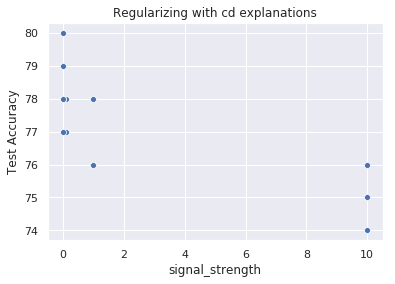

In [8]:
plot = sns.scatterplot(x ='signal_strength' , y='Test Accuracy', data = my_results);

plot.set_title("Regularizing with cd explanations");


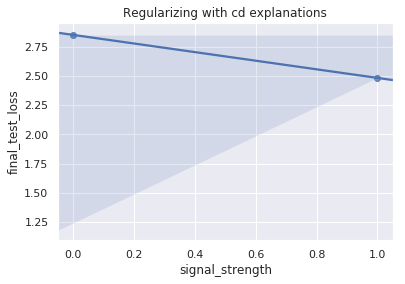

In [26]:
plot = sns.regplot(x ='signal_strength' , y='final_test_loss', data = my_results[my_results.signal_strength <=100] );

plot.set_title("Regularizing with cd explanations");
